In [79]:
# Imported important libraries that are required for EDA
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [80]:
# Importing raw csv file to perform EDA
df = pd.read_csv("C:\\Users\\Rajch\\Desktop\\Hackathon\\data\\raw\\raw_file.csv")

In [81]:
df.head()

,City/District,Waste Type,Waste Generated (Tons/Day),Recycling Rate (%),Population Density (People/km²),Municipal Efficiency Score (1-10),Disposal Method,Cost of Waste Management (₹/Ton),Awareness Campaigns Count,Landfill Name,"Landfill Location (Lat, Long)",Landfill Capacity (Tons),Year
0,Mumbai,Plastic,6610,68,11191,9,Composting,3056,14,Mumbai Landfill,"22.4265, 77.4931",45575,2019
1,Mumbai,Organic,1181,56,11191,5,Composting,2778,12,Mumbai Landfill,"22.4265, 77.4931",45575,2019
2,Mumbai,E-Waste,8162,53,11191,8,Incineration,3390,13,Mumbai Landfill,"22.4265, 77.4931",45575,2019
3,Mumbai,Construction,8929,56,11191,5,Landfill,1498,14,Mumbai Landfill,"22.4265, 77.4931",45575,2019
4,Mumbai,Hazardous,5032,44,11191,7,Recycling,2221,16,Mumbai Landfill,"22.4265, 77.4931",45575,2019


In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 13 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   City/District                      850 non-null    object
 1   Waste Type                         850 non-null    object
 2   Waste Generated (Tons/Day)         850 non-null    int64 
 3   Recycling Rate (%)                 850 non-null    int64 
 4   Population Density (People/km²)    850 non-null    int64 
 5   Municipal Efficiency Score (1-10)  850 non-null    int64 
 6   Disposal Method                    850 non-null    object
 7   Cost of Waste Management (₹/Ton)   850 non-null    int64 
 8   Awareness Campaigns Count          850 non-null    int64 
 9   Landfill Name                      850 non-null    object
 10  Landfill Location (Lat, Long)      850 non-null    object
 11  Landfill Capacity (Tons)           850 non-null    int64 
 12  Year    

In [83]:
df.isnull().sum()

City/District                        0
Waste Type                           0
Waste Generated (Tons/Day)           0
Recycling Rate (%)                   0
Population Density (People/km²)      0
Municipal Efficiency Score (1-10)    0
Disposal Method                      0
Cost of Waste Management (₹/Ton)     0
Awareness Campaigns Count            0
Landfill Name                        0
Landfill Location (Lat, Long)        0
Landfill Capacity (Tons)             0
Year                                 0
dtype: int64

In [84]:
df[["Latitude", "Longitude"]] = df["Landfill Location (Lat, Long)"].str.split(",", expand=True).apply(lambda x: x.str.strip())

In [85]:
df["Latitude"] = pd.to_numeric(df["Latitude"])

In [86]:
df["Longitude"] = pd.to_numeric(df["Longitude"])

In [87]:
df = df.drop(columns=["Landfill Location (Lat, Long)"])

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   City/District                      850 non-null    object 
 1   Waste Type                         850 non-null    object 
 2   Waste Generated (Tons/Day)         850 non-null    int64  
 3   Recycling Rate (%)                 850 non-null    int64  
 4   Population Density (People/km²)    850 non-null    int64  
 5   Municipal Efficiency Score (1-10)  850 non-null    int64  
 6   Disposal Method                    850 non-null    object 
 7   Cost of Waste Management (₹/Ton)   850 non-null    int64  
 8   Awareness Campaigns Count          850 non-null    int64  
 9   Landfill Name                      850 non-null    object 
 10  Landfill Capacity (Tons)           850 non-null    int64  
 11  Year                               850 non-null    int64  

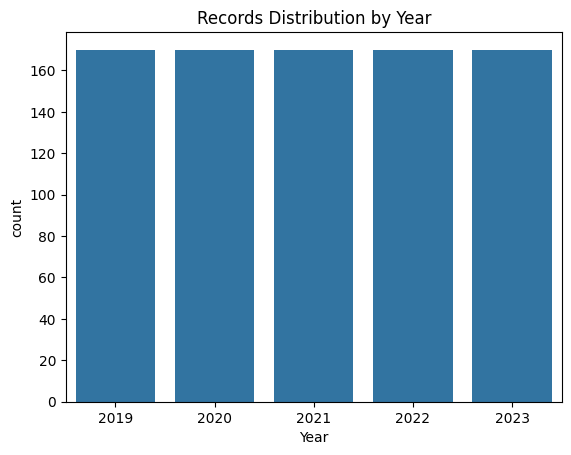

In [89]:
sns.countplot(x='Year', data=df)
plt.title('Records Distribution by Year')
plt.show()

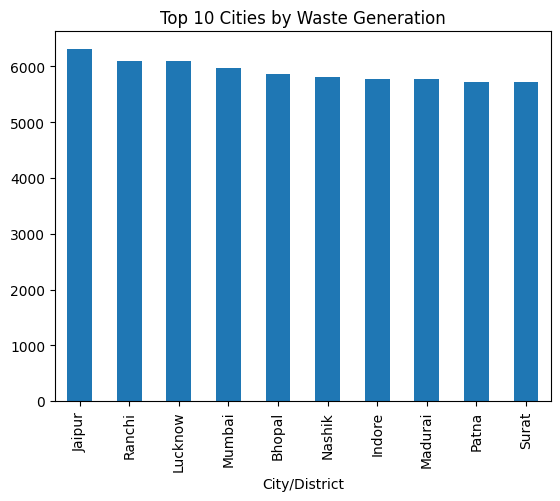

In [90]:
city_waste = df.groupby('City/District')['Waste Generated (Tons/Day)'].mean().nlargest(10)
city_waste.plot(kind='bar', title='Top 10 Cities by Waste Generation')
plt.show()

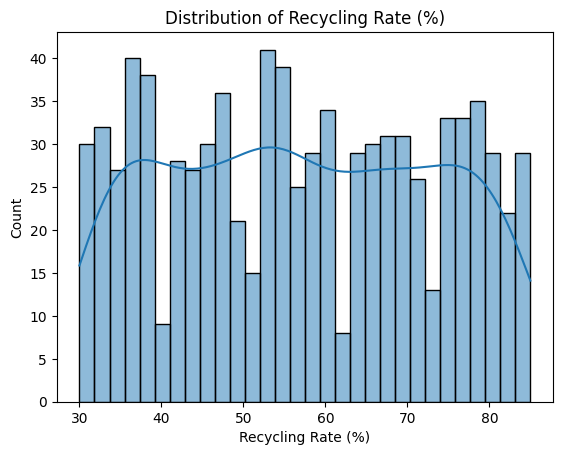

In [91]:
sns.histplot(df['Recycling Rate (%)'], bins=30, kde=True)
plt.title('Distribution of Recycling Rate (%)')
plt.show()

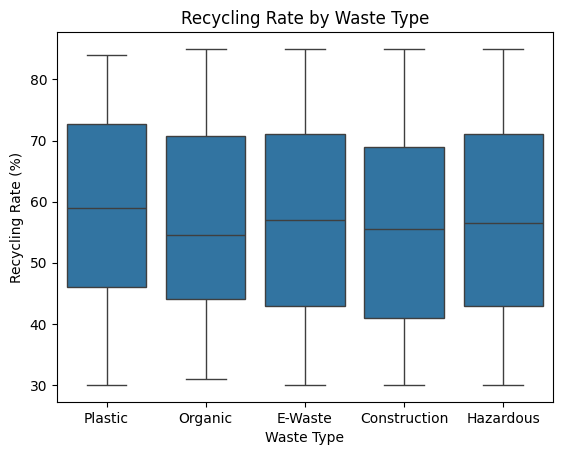

In [92]:
sns.boxplot(x='Waste Type', y='Recycling Rate (%)', data=df)
plt.title('Recycling Rate by Waste Type')
plt.show()

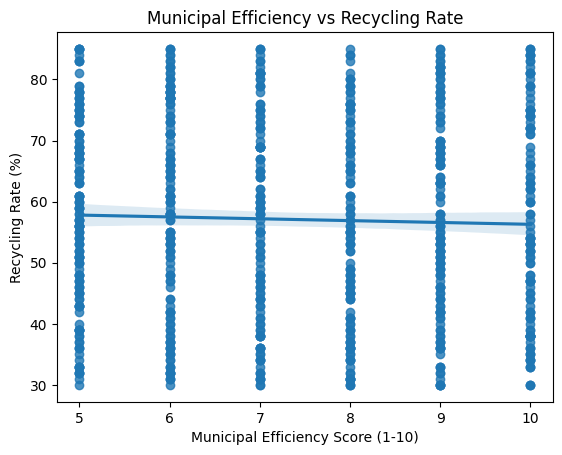

In [93]:
sns.regplot(x='Municipal Efficiency Score (1-10)', y='Recycling Rate (%)', data=df)
plt.title('Municipal Efficiency vs Recycling Rate')
plt.show()

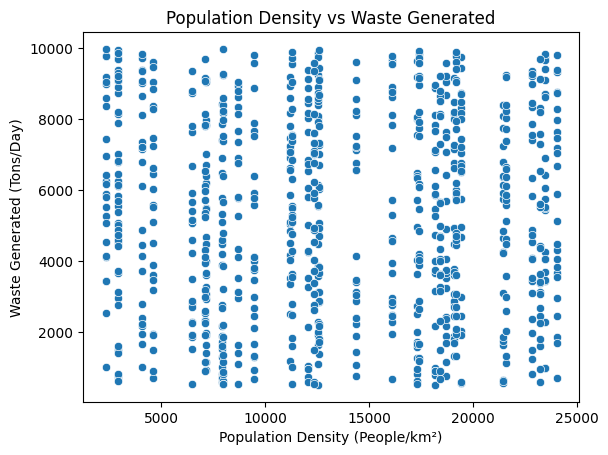

In [94]:
sns.scatterplot(x='Population Density (People/km²)', y='Waste Generated (Tons/Day)', data=df)
plt.title('Population Density vs Waste Generated')
plt.show()

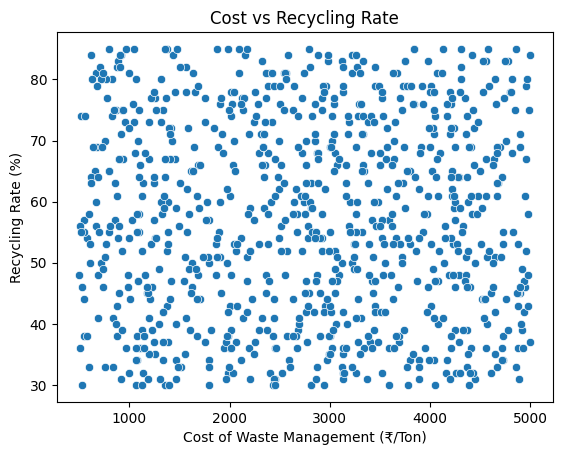

In [95]:
sns.scatterplot(x='Cost of Waste Management (₹/Ton)', y='Recycling Rate (%)', data=df)
plt.title('Cost vs Recycling Rate')
plt.show()

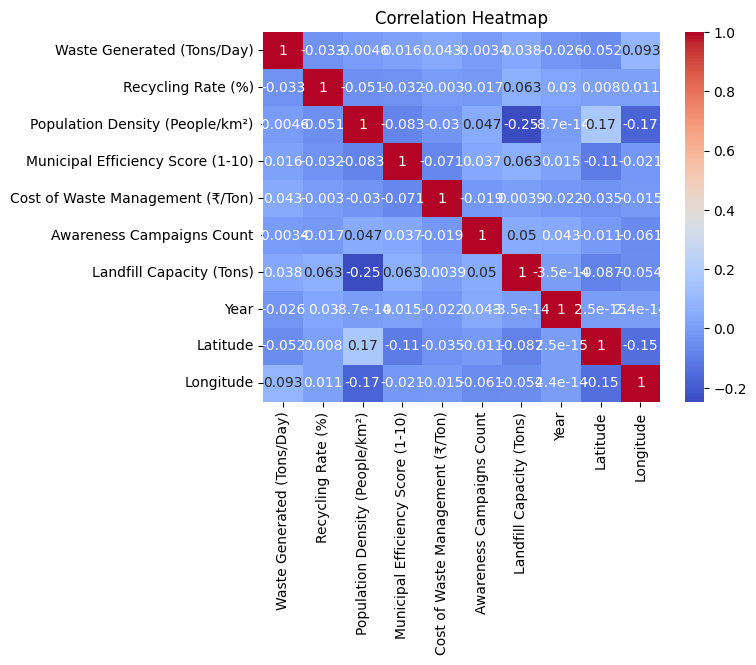

In [96]:
corr = df.select_dtypes(include=['float', 'int']).corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

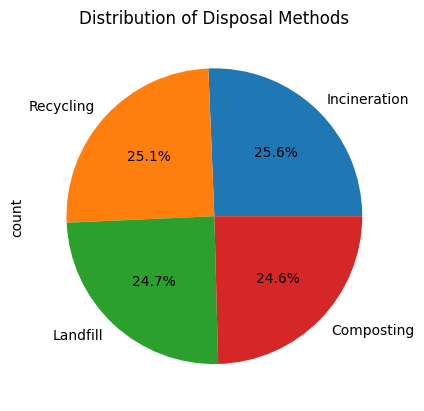

In [97]:
df['Disposal Method'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of Disposal Methods')
plt.show()

In [98]:
df.columns

Index(['City/District', 'Waste Type', 'Waste Generated (Tons/Day)',
       'Recycling Rate (%)', 'Population Density (People/km²)',
       'Municipal Efficiency Score (1-10)', 'Disposal Method',
       'Cost of Waste Management (₹/Ton)', 'Awareness Campaigns Count',
       'Landfill Name', 'Landfill Capacity (Tons)', 'Year', 'Latitude',
       'Longitude'],
      dtype='object')

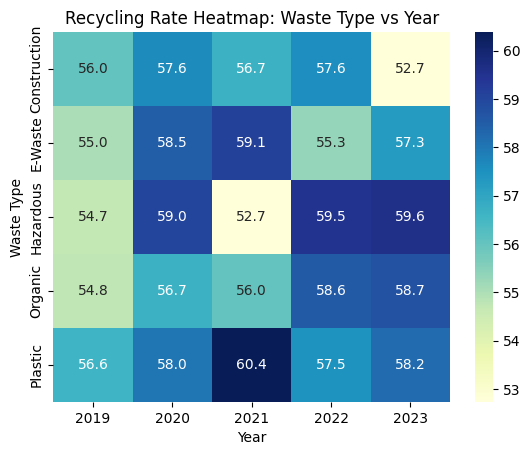

In [99]:
# Pivot table for heatmap
pivot_data = df.pivot_table(
    values='Recycling Rate (%)',
    index='Waste Type',
    columns='Year',
    aggfunc='mean'
)

sns.heatmap(pivot_data, annot=True, cmap='YlGnBu', fmt='.1f')
plt.title('Recycling Rate Heatmap: Waste Type vs Year')
plt.xlabel('Year')
plt.ylabel('Waste Type')
plt.show()
